# IMPORTANT

In [3]:
# The notebook should be named as ADS_HW5_<net_id>
# 10 pts will be deducted if the naming convention is not followed

# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

__ The prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function.__

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

__ False, Gaussian * Gaussian does not lead to another Gaussian distribution. __

# Task 2 (5 pts). 


1) In the Bayesian linear regression framework (True or False) 

    a) Using a Laplacian prior will lead to the Ridge Regression  (False)
    
    b) Using a Laplacian prior will lead to Lasso Regression (True)

2) (True or False)  

    a) Ridge can often help with feature selection  (True)
    
    b) Lasso can often help with feature selection  (True)

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  

        Ridge
        
1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

        Lasso

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?
        
        Ridge

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

        Lasso

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

        0

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

        training

# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

        Lasso, because Lasso will set the colinear variable coeficient to 0, 
        hence eliminating features that are highly correlated. 

# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?




$$
p(w|y=y_i, x=x_i)\sim p(y=y_i|w,x=x_i)p(w)\sim e^{-\frac{(y_i-w x_i)^2}{2\sigma^2}-\frac{(w-w^*)^2}{2(\sigma^*)^2}}\sim
$$$$
\sim e^{-w^2 \frac{x_i^2(\sigma^*)^2+\sigma^2}{2\sigma^2(\sigma^*)^2}+w \frac{(\sigma^*)^2 y_i x_i+\sigma^2 w^*}{2\sigma^2(\sigma^*)^2}}
\sim e^{\frac{\left(w-\frac{ \sigma^{-2} y_i x_i +(\sigma^*)^{-2} w^*}{ \left(x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)}\right)^2}{\frac{2 }{(\sigma^*)^{-2}+x_i^2\sigma^{-2}}}}
$$

__the posterior is when __

$$
y_i = 14, 
x_i = 4, 
w^* = 4, 
\sigma^* = 2, 
$$

__ the probability of having w < 4 is the cumulative probability function of the posterior __

$$
p(w<4|y=y_i, x=x_i) = \int_{-\infty}^4 p(w|y=y_i, x=x_i)\,dw
$$

$$
y_i = 14, 
x_i = 4, 
w^* = 4, 
\sigma^* = 2, 
$$

# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [20]:
## Learn to use numpy - Will be more useful in future
import pandas as pd
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
#import Quandl
import statsmodels.formula.api as smf
# from pandas.stats.api import ols
from sklearn import linear_model

data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

Populating the interactive namespace from numpy and matplotlib


In [21]:
data_train.columns = list(map(lambda x: 'x' + str(x), data_train.columns))
data_test.columns = list(map(lambda x: 'x' + str(x), data_test.columns))

In [22]:
result = smf.ols(formula = 'x40 ~ -1 + '+ '+'.join(data_train.columns[:-1]), data = data_train).fit()

In [23]:
# For displaying R^2 and linear model summary
def modelEval(lm, test, key = 'Y'):
    lmy = lm.predict(test)
    y_err = lmy - test[key]
    y_norm = test[key]-np.mean(test[key])
    return 1 - y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [24]:
print('In sample R-squared: %f'%result.rsquared)
print('Out of sample R-squared: %f'%modelEval(result, data_test, key = 'x40'))

In sample R-squared: 1.000000
Out of sample R-squared: -1.027964


# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [25]:
Lam_r = 3000
Lam_l = 30

Ridge=linear_model.Ridge(fit_intercept=True,alpha=Lam_r) #redo Ridge and Lasso with selected regularization parameter lambda
Lasso=linear_model.Lasso(fit_intercept=True,alpha=Lam_l)

X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]

X_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]

Ridge.fit(X_train,y_train)
Lasso.fit(X_train,y_train)

#In sample
p_IS = Ridge.predict(X_train)
err_IS = p_IS-y_train
R_2_IS_Ridge = 1-np.var(err_IS)/np.var(y_train)

p_IS = Lasso.predict(X_train)
err_IS = p_IS-y_train
R_2_IS_Lasso = 1-np.var(err_IS)/np.var(y_train)

Ridge_coef = Ridge.coef_
Lasso_coef = Lasso.coef_

#Out of sample 
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)

p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)

#Reports
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Lasso))
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))


The R-squared we found for IS Ridge is: 0.919670798393811
The R-squared we found for OS Ridge is: 0.5210781670825777
The R-squared we found for IS Lasso is: 0.8781356842410998
The R-squared we found for OS Lasso is: 0.6480046820153794



# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


In [26]:
Number_variables=range(len(data_train.columns[:-1]))
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
R_2_IS_Ridge = []
R_2_IS_Lasso = []
R_2_OS_Ridge = []
R_2_OS_Lasso = []

for i in Number_variables:    
    lm = smf.ols(formula = 'x40 ~ '+ '+'.join(data_train.columns[:i+1]), data = data_train).fit()
    R2 = modelEval(lm, data_test, 'x40')
    
    OLS_R_2_IS_F.append(lm.rsquared)
    OLS_R_2_OS_F.append(R2 if R2 > 0 else 0)
    
    Ridge=linear_model.Ridge(fit_intercept=True,alpha=Lam_r)
    Lasso=linear_model.Lasso(fit_intercept=True,alpha=Lam_l)
    
    X_train = data_train.iloc[:,:i+1]
    y_train = data_train.iloc[:,-1]

    X_test = data_test.iloc[:,:i+1]
    y_test = data_test.iloc[:,-1]

    Ridge.fit(X_train,y_train)
    Lasso.fit(X_train,y_train)
    
    #In sample
    p_IS = Ridge.predict(X_train)
    err_IS = p_IS-y_train
    R_2_IS_Ridge.append(1-np.var(err_IS)/np.var(y_train))

    p_IS = Lasso.predict(X_train)
    err_IS = p_IS-y_train
    R_2_IS_Lasso.append(1-np.var(err_IS)/np.var(y_train))

    #Out of sample 
    p_OS=Ridge.predict(X_test)
    err_OS=p_OS-y_test
    R_2_OS_Ridge.append(1-np.var(err_OS)/np.var(y_test))

    p_OS=Lasso.predict(X_test)
    err_OS=p_OS-y_test
    R_2_OS_Lasso.append(1-np.var(err_OS)/np.var(y_test))

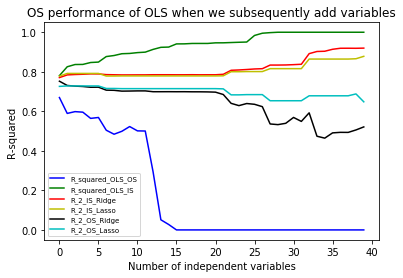

In [27]:
plt.title('OS performance of OLS when we subsequently add variables')
plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='R_squared_OLS_OS')
plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='R_squared_OLS_IS')
plt.plot(Number_variables,R_2_IS_Ridge,'r',label='R_2_IS_Ridge')
plt.plot(Number_variables,R_2_IS_Lasso,'y',label='R_2_IS_Lasso')
plt.plot(Number_variables,R_2_OS_Ridge,'k',label='R_2_OS_Ridge')
plt.plot(Number_variables,R_2_OS_Lasso,'c',label='R_2_OS_Lasso')

plt.legend(loc='lower left', fontsize = 'x-small')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

In [28]:
data = pd.concat([data_train, data_test])

In [29]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model, X, y, lambdas, t_size = 0.3, Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size =  t_size) #not setting a random state here

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train,y_train)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return (best_lambda,best_R2)

In [35]:
from sklearn.model_selection import train_test_split
lambda_lasso = []
lambda_ridge = []
best_R2_lasso = []
best_R2_ridge = []

for i in range(10):
    lambdas = np.exp(np.linspace(-20,20,500))
    results_lasso = Regularization_fit_lambda(2,data.iloc[:,:-1],data.iloc[:,-1],lambdas, t_size = 0.3, Graph=False)
    results_ridge = Regularization_fit_lambda(1,data.iloc[:,:-1],data.iloc[:,-1],lambdas, t_size = 0.3, Graph=False)
    lambda_lasso.append(results_lasso[0])
    lambda_ridge.append(results_ridge[0])
    best_R2_lasso.append(results_lasso[1])
    best_R2_ridge.append(results_ridge[1])

C:\Users\caoba\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


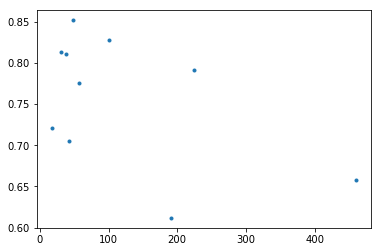

In [36]:
plt.plot(lambda_lasso, best_R2_lasso, '.')

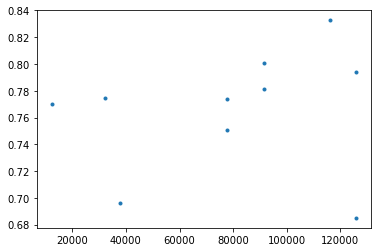

In [37]:
plt.plot(lambda_ridge, best_R2_ridge, '.')

In [38]:
best_R2_lasso 

[0.7046222301042708,
 0.8106432017713355,
 0.8136546255037725,
 0.8279149131137542,
 0.7759054797622491,
 0.8517059045363556,
 0.6117001561533062,
 0.6577295069119845,
 0.7205115479210453,
 0.7914812907147499]

In [39]:
best_R2_ridge 

[0.7814035811925908,
 0.8010377644306913,
 0.8326996357850142,
 0.7504154701925655,
 0.793751702119219,
 0.696401349692941,
 0.7739935309156011,
 0.6850093832352139,
 0.7701780442564319,
 0.7744089911636535]